In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

In [2]:
X, y = load_boston().data, load_boston().target.reshape(-1,1)

In [3]:
X.shape, y.shape

((506, 13), (506, 1))

In [47]:
class NN_Build(object):
    def __init__(self, eta = 0.0005, iterations = 1000, activation = "relu", epsilon = 0.01, kernel_init = 'he_init', 
                 dims = [X.shape[1],30,5,1], lam = 0.9):
        self.eta = eta
        self.iterations = iterations
        self.activation = activation
        self.epsilon = epsilon
        self.kernel_init = kernel_init
        self.dims = dims
        self.layer = len(dims)
        self.lam = lam
        
    def fit(self,X,y):
        X_ = X.T
        y_ = y.T
        A0 = X_
        i = 1
        m_ = len(y)
        parameters = {}
        cost_ = []
        cost_mae_ = []
        
        if self.kernel_init == "he_init":
            for l in range(1,self.layer):
                parameters['W'+str(l)] = np.random.randn(self.dims[l],self.dims[l-1])  * np.sqrt(2/self.dims[l-1]) 
                parameters['b' + str(l)] = np.zeros((self.dims[l],1)) 
            print('kernel_init is he_init')
        else:
            for l in range(1,self.layer):
                parameters['W'+str(l)] = np.random.randn(self.dims[l],self.dims[l-1])  * self.epsilon
                parameters['b' + str(l)] = np.zeros((self.dims[l],1)) 
            print('kernel_init is random nd')
        
        while(i !=self.iterations+1):
            #forward prop
            Z1 = np.dot(parameters['W1'],A0) + parameters['b1']
            if self.activation == "relu":
                A1 = self.relu(Z1)
            else:
                A1 = self.sigmoid(Z1)
            Z2= np.dot(parameters['W2'],A1) + parameters['b2']
            if self.activation == "relu":
                A2 = self.relu(Z2)
            else:
                A2 = self.sigmoid(Z2)
            Z3 = np.dot(parameters['W3'],A2) + parameters['b3']
            A3 = Z3            
            #cost
            l2_reg = (self.lam/(2*m_)) * (np.sum(np.square(parameters['W1']))+np.sum(np.square(parameters['W2']))+np.sum(np.square(parameters['W3'])))
            cost = self.MSE(y_true = y_, y_pred = A3 , n = m_) + l2_reg
            cost_.append(cost)
            cost_mae = self.MAE(y_true = y_, y_pred = A3 , n = m_) + l2_reg
            cost_mae_.append(cost_mae)           
            #derivative
            dZ3 = A3 - y_
            dW3 = (1/m_) * np.dot(dZ3,A2.T) + (self.lam/m_) * parameters['W3']
            db3 = (1/m_) * np.sum(dZ3, axis = 1, keepdims= True)
            if self.activation == 'relu':
                dZ2 = np.dot(parameters['W3'].T,dZ3) * (np.where(A2>=0,1,0))
            else:
                dZ2 = np.dot(parameters['W3'].T,dZ3) * (A2 * (1-A2))
            dW2 = (1/m_) * np.dot(dZ2,A1.T) + (self.lam/m_) * parameters['W2']
            db2 = (1/m_) * np.sum(dZ2, axis = 1, keepdims= True)
            if self.activation == 'relu':
                dZ1 = np.dot(parameters['W2'].T,dZ2) * (np.where(A1>=0,1,0))
            else:
                dZ1 = np.dot(parameters['W2'].T,dZ2) * (A1 * (1-A1))
            dW1 = (1/m_) * np.dot(dZ1,A0.T) + (self.lam/m_) * parameters['W1']
            db1 = (1/m_) * np.sum(dZ1, axis = 1, keepdims= True)
            #update
            parameters['W3'] -= self.eta * dW3
            parameters['W2'] -= self.eta * dW2
            parameters['W1'] -= self.eta * dW1
            parameters['b3'] -= self.eta * db3
            parameters['b2'] -= self.eta * db2
            parameters['b1'] -= self.eta * db1
            #inform
            if i % 200 == 0:
                print('epoch_{} cost: {}  mae: {}'.format(i,cost,cost_mae))
            
            i += 1
            
        history = pd.DataFrame(cost_, columns = ['cost'])
        history['mae'] = cost_mae_
        plt.figure(figsize = (14,4))
        plt.subplot(1,2,1)
        plt.plot(history.cost)
        plt.subplot(1,2,2)
        plt.plot(history.mae)
        return parameters,A3,A2
    
    def sigmoid(self,z):
        return 1 / (1+ np.exp(-z))
    
    def relu(self,z):
        return np.where(z>=0,z,0)
    
    def MSE(self,y_true,y_pred,n):
        return (1/n) * np.sum(np.square(y_true-y_pred))
    
    def MAE(self,y_true,y_pred,n):
        return (1/n) * np.sum(np.abs(y_true-y_pred))
        
        

kernel_init is he_init
epoch_200 cost: 224.04269100925904  mae: 11.761916253636162
epoch_400 cost: 204.44715280378347  mae: 11.244533573846377
epoch_600 cost: 192.40504109348032  mae: 10.909106727808615
epoch_800 cost: 182.63152432814334  mae: 10.638204798673685
epoch_1000 cost: 174.0226150825228  mae: 10.386446850585372
epoch_1200 cost: 166.5172290796763  mae: 10.158577020578166
epoch_1400 cost: 159.95209112376904  mae: 9.950039109929982
epoch_1600 cost: 154.06873730870512  mae: 9.758174603387783
epoch_1800 cost: 148.8252483121281  mae: 9.58764090637151
epoch_2000 cost: 144.04157211337002  mae: 9.42964268172654
epoch_2200 cost: 139.7112598216458  mae: 9.286152805130058
epoch_2400 cost: 135.64941674063678  mae: 9.152321640690865
epoch_2600 cost: 131.8801983369511  mae: 9.022506139354793
epoch_2800 cost: 128.25200695149798  mae: 8.892930107620069
epoch_3000 cost: 124.72993530873286  mae: 8.764346950458402
epoch_3200 cost: 121.4652287038417  mae: 8.642703110581154
epoch_3400 cost: 118.32

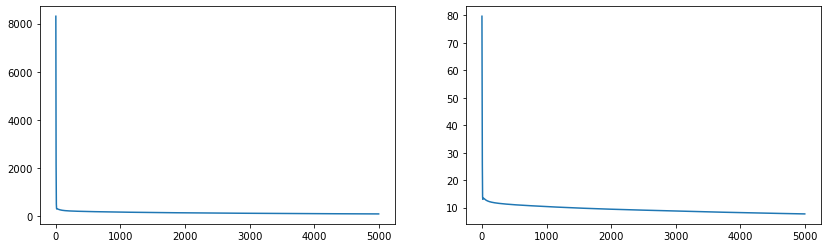

In [48]:
parameters, A3, A2 = NN_Build(eta=0.0000005,
    iterations=5000,
    activation='relu',
    epsilon=0.01,
    kernel_init='he_init',
    dims=[13, 30, 8, 1],
    lam = 0.9).fit(X,y)

In [49]:
A2.shape

(8, 506)

In [50]:
A3.shape

(1, 506)

In [51]:
A2.T

array([[  0.        , 127.67770464,  39.04111414, ...,  83.8379869 ,
         30.10444435,   0.        ],
       [  0.        , 131.0799327 ,  19.66264752, ...,  99.45280016,
         21.09641792,   0.        ],
       [  0.        , 133.47457454,  28.54848568, ...,  98.99930022,
         14.82232004,   0.        ],
       ...,
       [  0.        , 121.91552359,  24.9546225 , ...,  80.96597985,
         45.67567865,   0.        ],
       [  0.        , 121.11623925,  26.00703946, ...,  79.89540951,
         46.0680718 ,   0.        ],
       [  0.        , 125.34869621,  30.55841207, ...,  83.89122246,
         41.2614575 ,   0.        ]])

<AxesSubplot:>

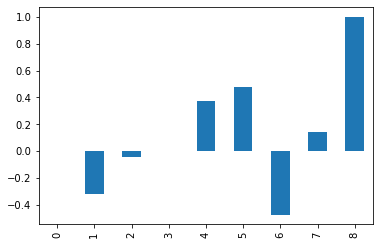

In [54]:
pd.DataFrame(np.hstack([A2.T,y])).corr().fillna(0).iloc[8,:].plot(kind = 'bar')